In [3]:
%matplotlib inline
#Use %matplotlib qt to open up interactive plot
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy.misc # For saving images as needed
import glob # For reading in a list of images from a folder

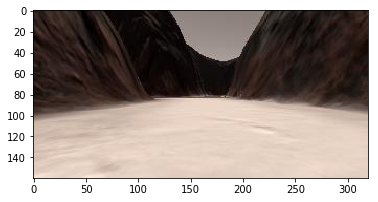

In [9]:
# Read in a random image and display

path = './Roverism_Data/Data_Set_1/IMG/*'
img_list = glob.glob(path)
index = np.random.randint(0,len(img_list)-1)
image = mpimg.imread(img_list[index])
plt.imshow(image)

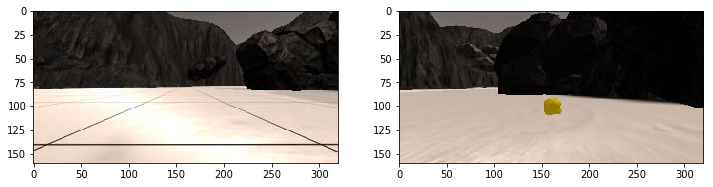

In [12]:
# CALIBRATION DATA
# In the simulator, you can toggle on a grid on the ground for calibration
# You can also toggle on the rock samples with the 0 (zero) key.

grid_image_path = './Roverism_Data/example_grid1.jpg'
rock_image_path = './Roverism_Data/example_rock1.jpg'
grid_image = mpimg.imread(grid_image_path)
rock_image = mpimg.imread(rock_image_path)

fig = plt.figure(figsize=(12,3))
plt.subplot(121)
plt.imshow(grid_image)
plt.subplot(122)
plt.imshow(rock_image)

In [ ]:
# COLOR THRESHOLDING

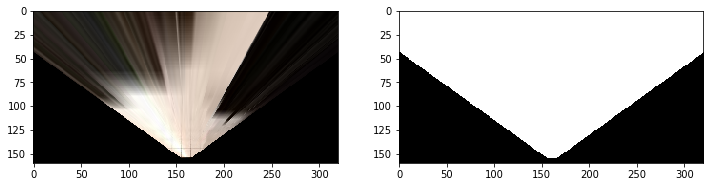

In [21]:
# PERSPECTIVE TRANSFORM

def perspect_transform(img, source, destination):
    M = cv2.getPerspectiveTransform(source, destination)
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0])) # keep same size as input image
    # Use an image array of all ones to find Field of View ( NOTE - )
    mask = cv2.warpPerspective(np.ones_like(img[:,:,0]), M, (img.shape[1], img.shape[0])) 
    return warped, mask

# Let 1 square meter (on source) map to 10x10 pixel square (on destination)
# The destination box will be 2*dst_size on each size
dst_size = 5
# Set a bottom offset to account for the fact that the bottom of the image is not the position of the rover but a bit in front of it
bottom_offset = 6  

source = np.float32([[14, 140], [301 ,140],[200, 96], [118, 96]])  # found coordinates using an interactive plot
destination = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - 2*dst_size - bottom_offset], 
                  [image.shape[1]/2 - dst_size, image.shape[0] - 2*dst_size - bottom_offset],
                  ])
warped,mask = perspect_transform(grid_image, source, destination)

fig = plt.figure(figsize=(12,3))
plt.subplot(121)
plt.imshow(warped)
plt.subplot(122)
plt.imshow(mask, cmap = 'gray')
#scipy.misc.imsave('./Output/warped_image.jpg',warped)


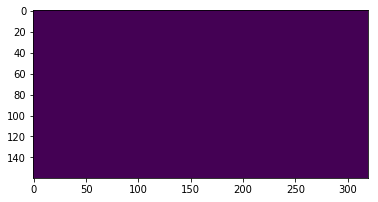

In [19]:
imghaha = np.zeros_like(image[:,:,0])
plt.imshow(imghaha)